# Clase 01 - Introducción a matplotlib

Profesor: **Fernando Becerra**, f.becerra@udd.cl, www.fernandobecerra.com

Esta es la primera clase práctica del curso "Visualización de la Información" del Magíster de Data Science de la Universidad del Desarrollo. Este notebook servirá de introducción al uso de [matplotlib](https://matplotlib.org) y [pandas](https://pandas.pydata.org) para el análisis y visualización de datos.

## Partes de una figura de matplotlib

Para comenzar, nos familiaricemos con los distintos elementos que componen una figura en `matplotlib`. Es bueno hacer la diferencia entre `figure`, `axes`, y `axis`, ya que esto nos permitirá más adelante manejarlos y personalizarlos a nuestro gusto.

In [1]:
from IPython.display import Image

La antigua versión de `matplotlib` usaba esta figura para hacer visualizar los diferentes componentes.

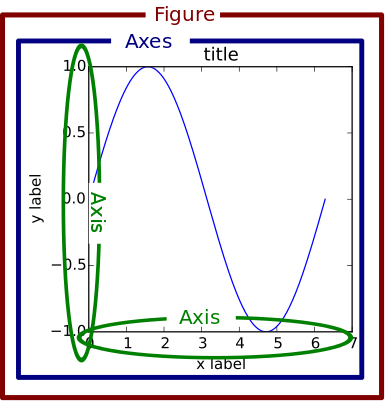

In [2]:
Image("https://matplotlib.org/1.5.1/_images/fig_map.png")

La [nueva documentación](https://matplotlib.org/stable/gallery/showcase/anatomy.html) incluye una figura un poco más ilustrativa, además de los comandos para acceder a cada una de las componentes. Esto nos permitirá modificarlas asta el último detalle.

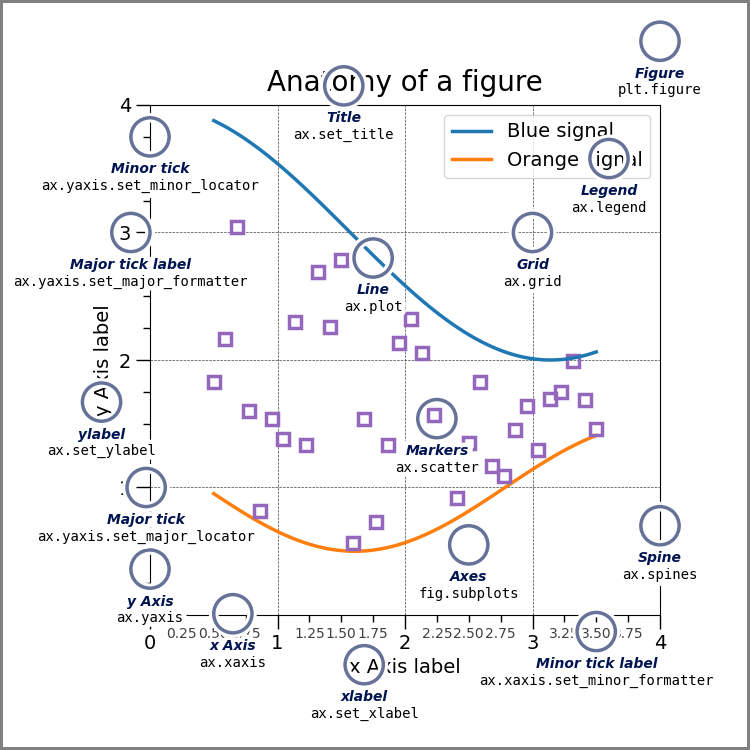

In [3]:
Image("https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png")

## Gráfico de líneas

Comenzaremos haciendo uno de los gráficos más comunes: el gráfico de líneas. Para eso, importaremos `matplotlib` y `numpy`, lo cual nos permitirá crear datos y graficarlos

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

Creamos los arreglos `x` e `y` que usaremos para nuestra demostración. El `y` será simplemente la función coseno de `x`, variable que va desde -5 a 5.

In [5]:
x = np.linspace(-5, 5, num=50)
y = np.cos(x)

La forma más fácil de usar `matplolib` es usando directamente el método `plot`

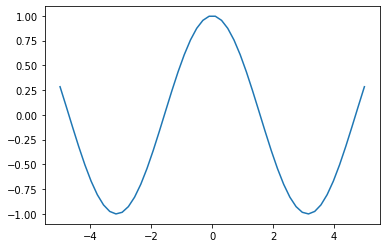

In [6]:
plt.plot(x, y, '-', label='coseno')

De la misma forma, podemos añadirle un título, los nombres de los ejes y una leyenda a la figura.

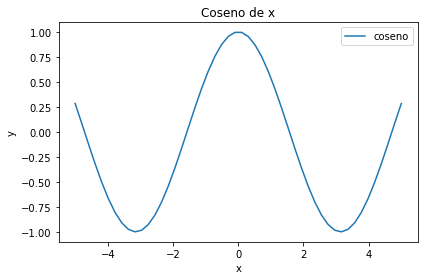

In [7]:
plt.plot(x, y, '-', label='coseno')

plt.title('Coseno de x')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.tight_layout()

A pesar de que esa es la forma más fácil de graficar los datos, nosotros queremos tener un mayor control sobre cada componente del gráfico, por lo que es mejor definir una `figure` y un `axes` que podamos manejar más adelante. Para eso ocuparemos `subplots`.

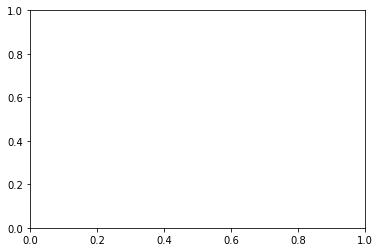

In [8]:
fig, ax = plt.subplots()

Ahora podemos graficar nuestros datos, ponerle un título al gráfico, el nombre a los ejes, y la leyenda. Ojo, que la notación ahora cambia un poco porque `plt` y `ax` **no tienen los mismos métodos**.

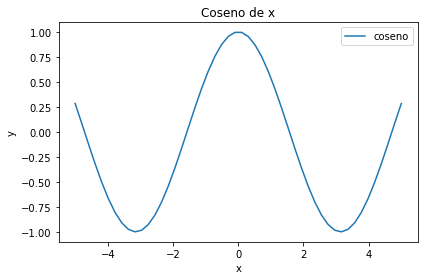

In [9]:
fig, ax = plt.subplots()

ax.plot(x, y, '-', label='coseno')
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

Así vamos a ir agregando más cosas de a poco. Primero agregamos círculos para marcar cada dato.

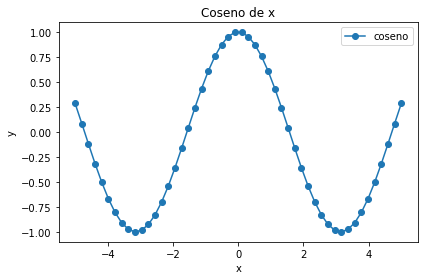

In [10]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', label='coseno')
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

Ahora pobramos con colores distintos.

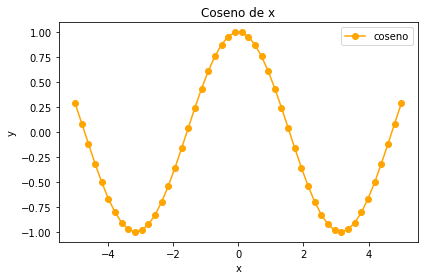

In [11]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', label='coseno', color='orange')
ax.set_title("Coseno de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

Ahora añadimos una segunda curva al mismo gráfico, para lo cual definimos la variable `z` como el seno de x. Posteriormente la graficamos usando un color de línea y un símbolo distinto al ya usado por la función coseno. En este caso hay que tener cuidado con el nombre del gráfico porque la función ya no corresponder solamente al coseno de x.

In [12]:
z = np.sin(x)

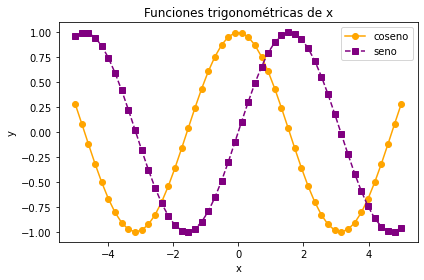

In [13]:
fig, ax = plt.subplots()

ax.plot(x, y, 'o-', label='coseno', color='orange')
ax.plot(x, z, 's--', label='seno', color='purple')
ax.set_title("Funciones trigonométricas de x")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

fig.tight_layout()

La ventaja del `subplots` es que nos permite definiar más de un `axes`, o dicho de otra forma, una grilla de gráficos. Pueden ser tanto horizontal como verticalmente, dependiendo de los parámetros que le demos.

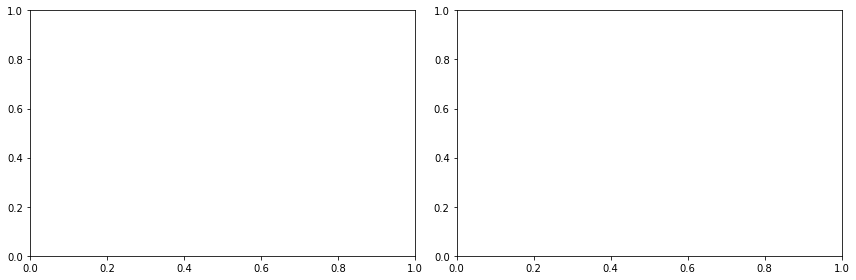

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

fig.tight_layout()

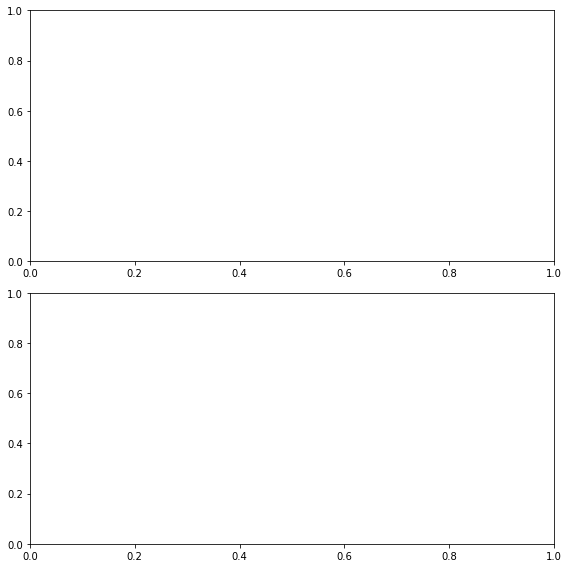

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

fig.tight_layout()

Ahora podemos graficar cada curva en uno de esos `axes` para separarlas.

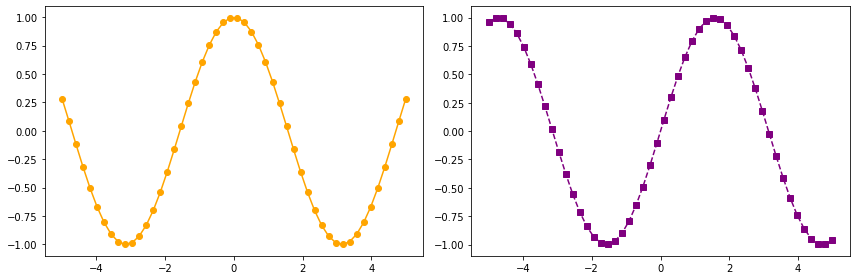

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, y, "o-", color='orange', label='coseno')
ax[1].plot(x, z, "s--", color='purple', label='seno')

fig.tight_layout()

Y podemos agregar el título y el nombre de los ejes por separado a cada `axes`

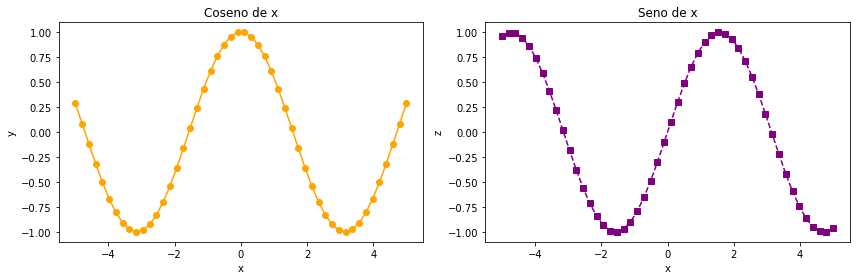

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, y, "o-", color='orange', label='coseno')
ax[0].set_title("Coseno de x")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")

ax[1].plot(x, z, "s--", color='purple', label='seno')
ax[1].set_title("Seno de x")
ax[1].set_xlabel("x")
ax[1].set_ylabel("z")

fig.tight_layout()

Con eso ya terminamos nuestro primer gráfico de líneas. (Que en verdad fueron dos gráficos de líneas.) Ahora pasamos al siguiente tipo de gráfico: el de dispersión.

## Gráfico de dispersión con datos de Gapminder

Para este ejercicio ocuparemos los datos de Gapminder, que muestran el PBI per cápita y la expectativa de vida para cada país, además de la población y del continente al cual pertenecen. Para cargar estos datos usaremos `pandas` y comenzaremos a trabajar con dataframes.

In [18]:
import pandas as pd

In [19]:
df_scatter = pd.read_csv("https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/rosling.csv")
df_scatter.head()

,Country,GDP per capita,Life expectancy,Population,Continent
0,Lesotho,2598,47.1,2174645,Africa
1,Central African Republic,599,49.6,4546100,Africa
2,Swaziland,6095,51.8,1319011,Africa
3,Afghanistan,1925,53.8,33736494,Asia
4,Somalia,624,54.2,13908129,Africa


Definimos las variables `x` e `y` que usaremos para el gráfico.

In [20]:
xlabel = 'GDP per capita'
ylabel = 'Life expectancy'

Por ahora, siguiendo la lógica del gráfico de línea, usaremos `ax.scatter` para el gráfico de dispersión.

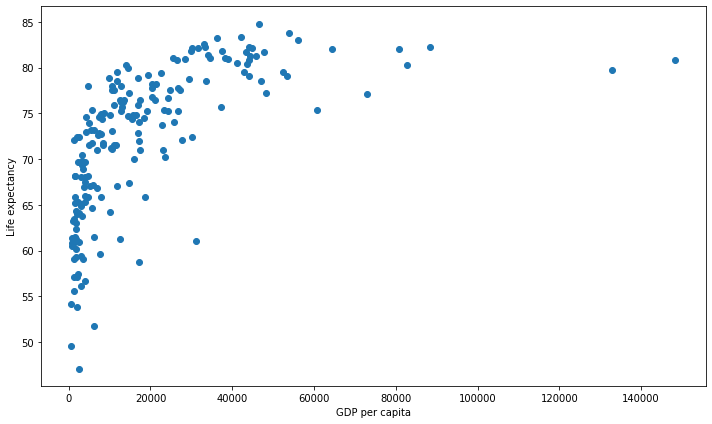

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Ahora podemos usar la población de cada país como el radio de los círculos.

In [22]:
size = 'Population'

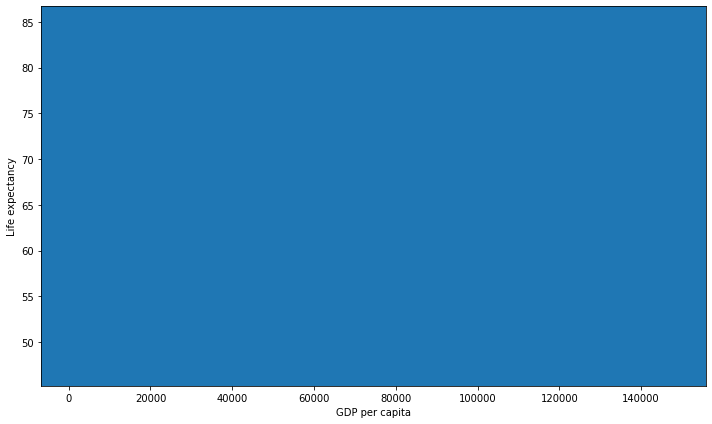

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel], s=df_scatter[size])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Bueno, hay que normalizar la población a un valor que nos permita graficar, así que se necesitan unos cálculos extras.

In [24]:
max_population = df_scatter[size].max()
df_scatter['radius'] = 2000 * df_scatter[size] / max_population

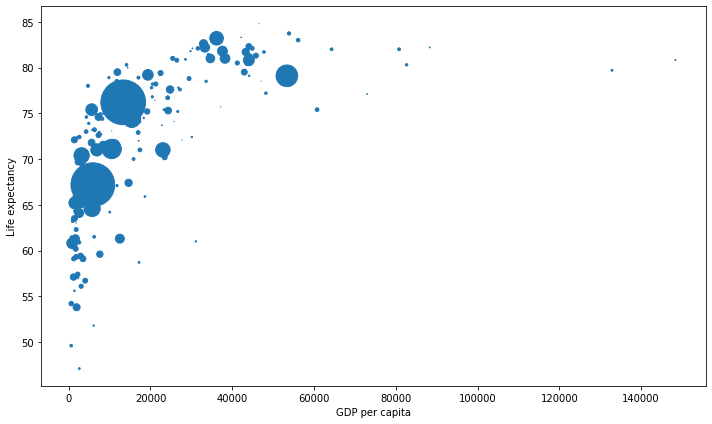

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel], s=df_scatter['radius'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Ahora la idea es colorear cada círculo dependiendo del continente al cual pertenece. Para eso debemos definiar una nueva columna con el color de cada país y pasarla como argumento al `ax.scatter`

In [26]:
pd.unique(df_scatter['Continent'])

array(['Africa', 'Asia', 'Australia', 'North America', 'South America',
       'Europe'], dtype=object)

In [27]:
df_scatter['color'] = df_scatter['Continent'].map({
    'Africa': '#e41a1c',
    'Asia': '#377eb8',
    'Australia': '#4daf4a',
    'North America': '#984ea3',
    'South America': '#ff7f00',
    'Europe': '#a65628'
})
df_scatter['color'].head(10)

0    #e41a1c
1    #e41a1c
2    #e41a1c
3    #377eb8
4    #e41a1c
5    #e41a1c
6    #e41a1c
7    #e41a1c
8    #e41a1c
9    #e41a1c
Name: color, dtype: object

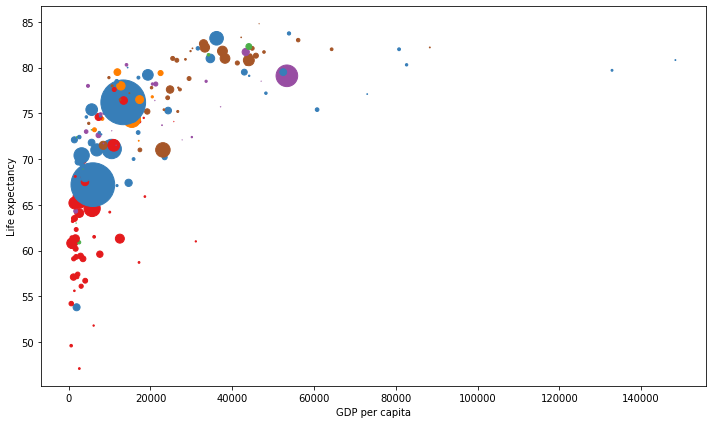

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['radius'],
           c=df_scatter['color'])
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Le bajaremos un poco la opacidad y agregaremos border blancos para que se puedan distinguir de mejor forma. Estos pequeños detalles son los que hacen la diferencia y nos llevan a crear las mejores visualizaciones.

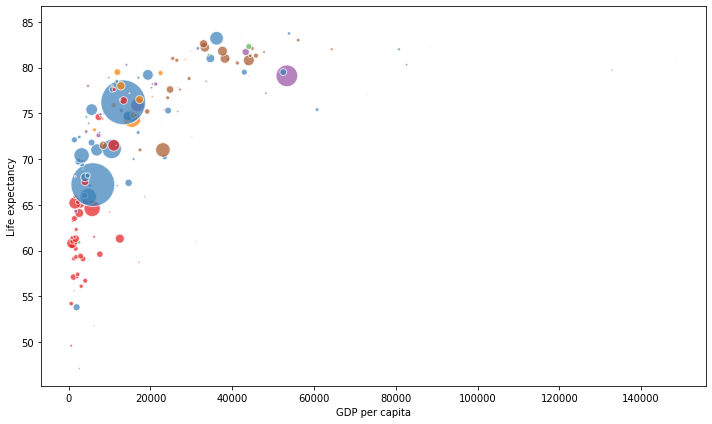

In [29]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['radius'],
           c=df_scatter['color'],
           alpha=0.7,
           edgecolor='white')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Ya que el rango de valores en el eje `x` es muy largo, probemos cómo se ve con un eje logarítmico.

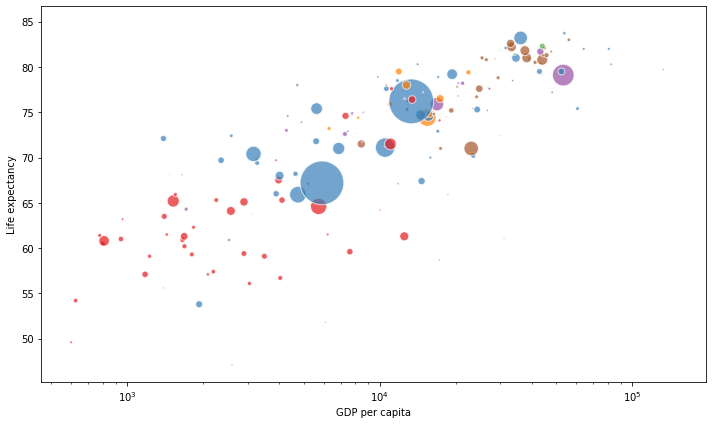

In [30]:
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(df_scatter[xlabel], df_scatter[ylabel],
           s=df_scatter['radius'],
           c=df_scatter['color'],
           alpha=0.7,
           edgecolor='white')
ax.set_xscale('log')
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)

fig.tight_layout()

Todo lo que hemos hecho hasta ahora, lo hemos hecho con `ax.scatter`. Los dataframe de `pandas` traen la mayoría de estas funciones integradas, de tal forma que crear uno de estos gráficos sea lo más fácil posible.

<AxesSubplot:xlabel='GDP per capita', ylabel='Life expectancy'>

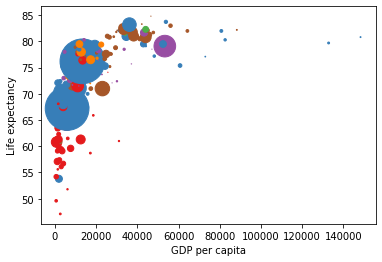

In [31]:
df_scatter.plot.scatter(x=xlabel, y=ylabel, s='radius', c='color')

Esto devuelve un `axes`, el que nosotros después podemos modificar para hacer una visualización más personalizada

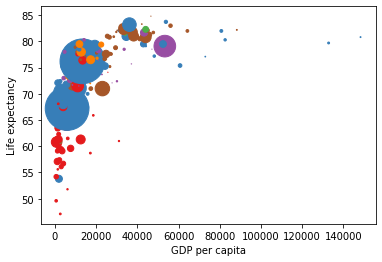

In [32]:
ax = df_scatter.plot.scatter(x=xlabel, y=ylabel, s='radius', c='color')

Por ejemplo, podemos cambiar la escala del eje `x`. Además, estos métodos también reciben como argumentos los mismos argumentos de `ax.scatter`, como, por ejemplo, `figsize`

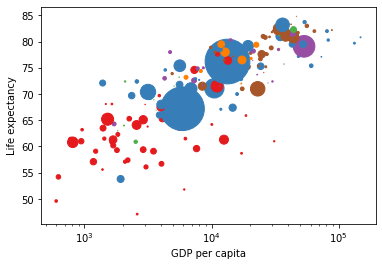

In [33]:
ax = df_scatter.plot.scatter(x=xlabel, y=ylabel, s='radius', c='color')
ax.set_xscale('log')

Quiero repetir que `pandas` no tiene nuevos métodos para crear gráficos, sino que integra los ya definidos en `matplotlib`, es por eso que para poder modificarlos hay que estar familiarizados con `matplotlib` primero. Ahora pasemos a otro de los típicos gráficos: el de barras.

## Gráfico de barras con datos del INE

Para esto, ocuparemos datos de la Encuesta Suplementaria de Ingresos del Instituto Nacional de Estadísticas.

In [34]:
df_bars = pd.read_csv("https://raw.githubusercontent.com/fbecerra/dataexperiments/master/data/ingresos.csv")
df_bars.head()

,Tramos de ingresos en pesos ($),Proporción de personas ocupadas (%)
0,0-100.000,5.7
1,100.000-200.000,6.5
2,200.000-300.000,8.3
3,300.000-400.000,18.6
4,400.000-500.000,15.4


En este caso, usaremos directamente el método que viene en el dataframe

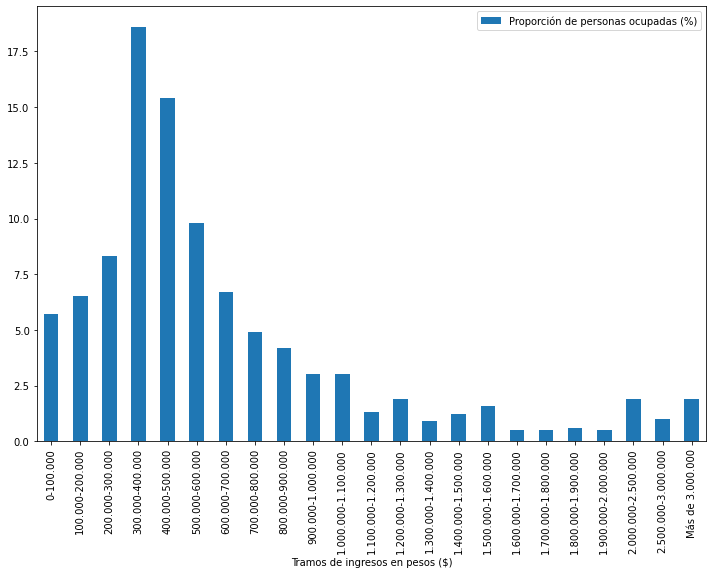

In [35]:
xlabel = 'Tramos de ingresos en pesos ($)'
ylabel = 'Proporción de personas ocupadas (%)'

ax = df_bars.plot.bar(x=xlabel, y=ylabel, figsize=(12,8))

Entre otras cosas, podemos modificar el ancho de las barras.

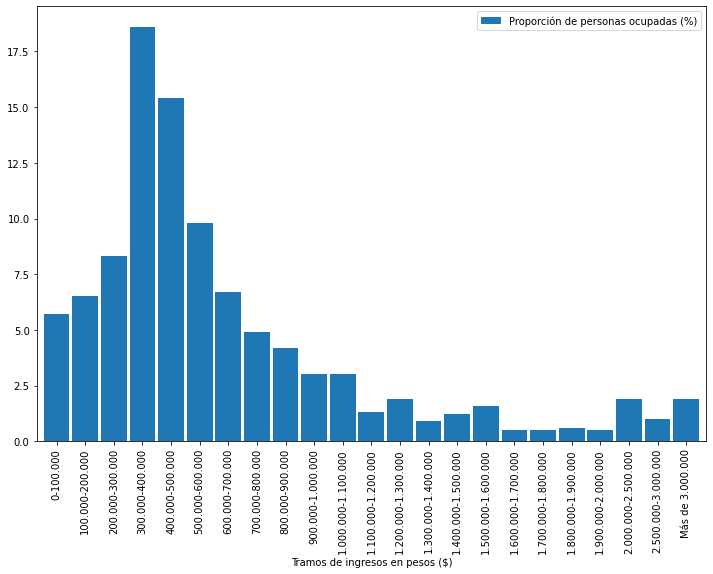

In [36]:
ax = df_bars.plot.bar(x=xlabel, y=ylabel, figsize=(12,8), width=0.9)

Como también podemos graficar las barra horizontalmente usando `barh`

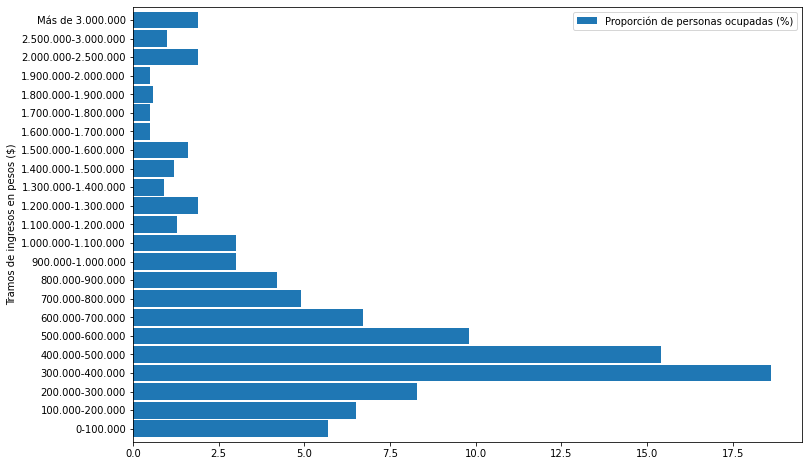

In [37]:
ax = df_bars.plot.barh(x=xlabel, y=ylabel, figsize=(12,8), width=0.9)

Por último, los dataframe de `pandas` también pueden recibir como argumento un `axes` que nosotrxs ya hayamos creado, lo que nos permite ubicarlos justo en el lugar que queremos. Por ejemplo, podemos crear una grilla de `axes` y ubicar nuestros gráficos ahí.

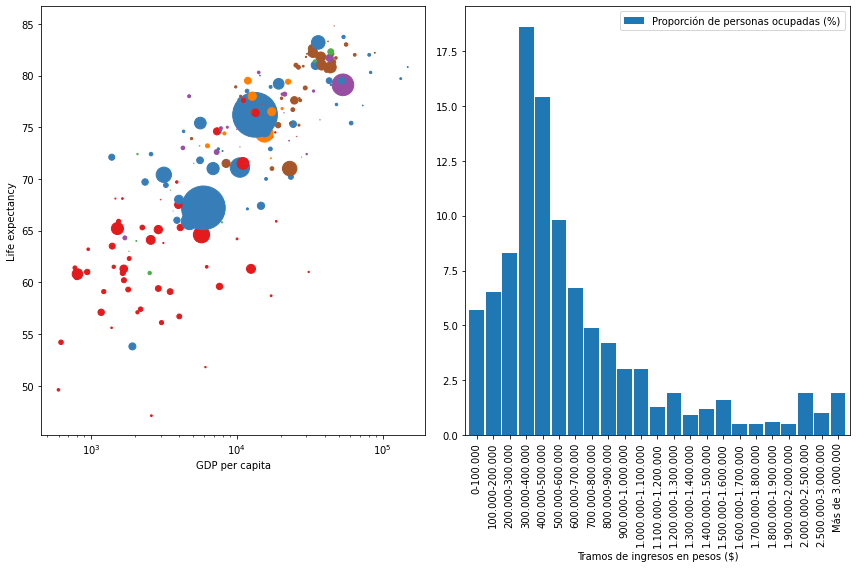

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

df_scatter.plot.scatter(x='GDP per capita', y='Life expectancy', s='radius', c='color', ax=ax[0])
df_bars.plot.bar(x=xlabel, y=ylabel, figsize=(12,8), width=0.9, ax=ax[1])
ax[0].set_xscale('log')

fig.tight_layout()

Con esto ya hemos cubierto lo básico -y a la vez, más usado- de `matplotlib`. En las próximas clases comenzaremos a fijarnos más en el diseño, la intención, y el mensaje de lo que queremos transmitir, a la vez que iremos haciendo otros tipos de visualizaciones más avanzadas.